<a href="https://colab.research.google.com/github/AntoonGoderis/Deep-Learning/blob/main/assignment_2_random_interpret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import cv2

import os
import json
import ast

import numpy as np
import pandas as pd
import cv2
from scipy.optimize import curve_fit

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD, AdamW

!pip install keras-tuner
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.regularizers import l2
from keras.utils import to_categorical

import keras_tuner as kt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import zipfile

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.efficientnet import preprocess_input as pi_efficient
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pi_resnet

from tensorflow.keras import layers, models, preprocessing






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile

# Replace 'path/to/your_file.zip' with the path to your zip file in Google Drive
zip_file_path = '/content/drive/My Drive/Assign2/training_data.zip'
extract_path = '/content/simpsons-mnist-master/dataset/rgb/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

zip_file_path = '/content/drive/My Drive/Assign2/test_data.zip'
extract_path = '/content/simpsons-mnist-master/dataset/rgb/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/drive


In [ ]:
base_dir = os.getcwd()

train_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "train")
test_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test")
#test_rotated_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test_rotated")
#test_zoomed_in_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test_zoomed_in")
#test_zoomed_out_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test_zoomed_out")

image_data = []
test_data = []
test_r_data = []
test_zi_data = []
test_zo_data = []

for class_name in os.listdir(train_path):

    class_path = os.path.join(train_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            image_data.append((os.path.join(class_path, img_name), class_name))

df_train = pd.DataFrame(image_data, columns=["image_path", "label"])
print(df_train.head())

for class_name in os.listdir(test_path):

    class_path = os.path.join(test_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_data.append((os.path.join(class_path, img_name), class_name))


df_test = pd.DataFrame(test_data, columns=["image_path", "label"])
print(df_test.head())

"""
for class_name in os.listdir(test_rotated_path):

    class_path = os.path.join(test_rotated_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_r_data.append((os.path.join(class_path, img_name), class_name))

df_test_r = pd.DataFrame(test_r_data, columns=["image_path", "label"])
print(df_test_r.head())

for class_name in os.listdir(test_zoomed_in_path):

    class_path = os.path.join(test_zoomed_in_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_zi_data.append((os.path.join(class_path, img_name), class_name))

df_test_zi = pd.DataFrame(test_zi_data, columns=["image_path", "label"])
print(df_test_zi.head())

for class_name in os.listdir(test_zoomed_out_path):

    class_path = os.path.join(test_zoomed_out_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_zo_data.append((os.path.join(class_path, img_name), class_name))

df_test_zo = pd.DataFrame(test_zo_data, columns=["image_path", "label"])
print(df_test_zo.head())
"""

                                          image_path          label
0  /content/simpsons-mnist-master/dataset/rgb/tra...  marge_simpson
1  /content/simpsons-mnist-master/dataset/rgb/tra...  marge_simpson
2  /content/simpsons-mnist-master/dataset/rgb/tra...  marge_simpson
3  /content/simpsons-mnist-master/dataset/rgb/tra...  marge_simpson
4  /content/simpsons-mnist-master/dataset/rgb/tra...  marge_simpson
                                          image_path          label
0  /content/simpsons-mnist-master/dataset/rgb/tes...  marge_simpson
1  /content/simpsons-mnist-master/dataset/rgb/tes...  marge_simpson
2  /content/simpsons-mnist-master/dataset/rgb/tes...  marge_simpson
3  /content/simpsons-mnist-master/dataset/rgb/tes...  marge_simpson
4  /content/simpsons-mnist-master/dataset/rgb/tes...  marge_simpson


'\nfor class_name in os.listdir(test_rotated_path):\n\n    class_path = os.path.join(test_rotated_path, class_name)\n\n    if os.path.isdir(class_path):\n        for img_name in os.listdir(class_path):\n            test_r_data.append((os.path.join(class_path, img_name), class_name))\n\ndf_test_r = pd.DataFrame(test_r_data, columns=["image_path", "label"])\nprint(df_test_r.head())\n\nfor class_name in os.listdir(test_zoomed_in_path):\n\n    class_path = os.path.join(test_zoomed_in_path, class_name)\n\n    if os.path.isdir(class_path):\n        for img_name in os.listdir(class_path):\n            test_zi_data.append((os.path.join(class_path, img_name), class_name))\n\ndf_test_zi = pd.DataFrame(test_zi_data, columns=["image_path", "label"])\nprint(df_test_zi.head())\n\nfor class_name in os.listdir(test_zoomed_out_path):\n\n    class_path = os.path.join(test_zoomed_out_path, class_name)\n\n    if os.path.isdir(class_path):\n        for img_name in os.listdir(class_path):\n            test_

In [ ]:
import cv2

def load_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not load image at {img_path}")
        return None
    img = img / 255.0
    return img

df_train["image_array"] = df_train["image_path"].apply(lambda x: load_image(x))
df_test["image_array"] = df_test["image_path"].apply(lambda x: load_image(x))



"""
def load_image(img_path):
    img = cv2.imread(img_path)
    img = img / 255.0
    return img


df_train["image_array"] = df_train["image_path"].apply(lambda x: load_image(x))

df_test["image_array"] = df_test["image_path"].apply(lambda x: load_image(x))

df_test_r["image_array"] = df_test_r["image_path"].apply(lambda x: load_image(x))

df_test_zi["image_array"] = df_test_zi["image_path"].apply(lambda x: load_image(x))

df_test_zo["image_array"] = df_test_zo["image_path"].apply(lambda x: load_image(x))
"""

sample_img = df_train["image_array"][0]
print(sample_img.shape)

(28, 28, 3)


In [ ]:
num_classes = df_train.label.nunique()
print(num_classes)

10


In [ ]:
label_encoder = LabelEncoder()
df_train["label_encoded"] = label_encoder.fit_transform(df_train["label"])
df_test["label_encoded"] = label_encoder.transform(df_test["label"])
"""
df_test_r["label_encoded"] = label_encoder.transform(df_test_r["label"])
df_test_zi["label_encoded"] = label_encoder.transform(df_test_zi["label"])
df_test_zo["label_encoded"] = label_encoder.transform(df_test_zo["label"])
"""


X_train_valid = np.stack(df_train["image_array"].values)


y_train_valid = to_categorical(df_train["label_encoded"], num_classes=num_classes)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=42)

X_test = np.stack(df_test["image_array"].values)
y_test = to_categorical(df_test["label_encoded"], num_classes=num_classes)
"""
X_test_r = np.stack(df_test_r["image_array"].values)
y_test_r = to_categorical(df_test_r["label_encoded"], num_classes=num_classes)

X_test_zi = np.stack(df_test_zi["image_array"].values)
y_test_zi = to_categorical(df_test_zi["label_encoded"], num_classes=num_classes)

X_test_zo = np.stack(df_test_zo["image_array"].values)
y_test_zo = to_categorical(df_test_zo["label_encoded"], num_classes=num_classes)
"""

print(X_train_valid.shape)
print(y_train_valid.shape)



(8000, 28, 28, 3)
(8000, 10)


In [ ]:
# first random search / broad

In [ ]:

import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# TPU initialization
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # Leave tpu= argument empty for Colab TPU
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Define the hyperparameter space
num_layers_options = list(range(1, 7))  # Reduce maximum number of layers to avoid excessive downsampling
neurons_options = list(range(16, 513, 16))
regs = [0.0005, 0.001, 0.0015, 0.0025, 0.005, 0.01]

# Set the number of random searches
n_random_searches = 10

best_model = None
best_val_acc = 0
best_hyperparams = None

results_G = []

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Initial Random Search
for _ in range(n_random_searches):
    # Randomly select a combination of hyperparameters
    num_layers = random.choice(num_layers_options)
    neurons = random.choice(neurons_options)
    reg = random.choice(regs)

    print(f"\nTesting Model with {num_layers} layers, {neurons} neurons, L2={reg}")

    with strategy.scope():
        model = Sequential()
        model.add(Input(shape=(28, 28, 3)))

        for i in range(num_layers):
            model.add(Conv2D(filters=neurons, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(reg)))
            model.add(BatchNormalization())
            model.add(LeakyReLU())
            # Apply MaxPooling2D every other layer to avoid excessive downsampling
            if i % 2 == 1:
                model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
            model.add(Dropout(0.3))

        model.add(GlobalAveragePooling2D())
        model.add(Dense(neurons, activation="relu"))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation="softmax"))

        optimizer = AdamW(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True, verbose=0)
        checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, monitor='val_accuracy', mode='max')
        csv_logger = CSVLogger('training_log.csv', append=True)

        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=64),
            validation_data=(X_valid, y_valid),
            epochs=100,  # Reduced number of epochs
            callbacks=[early_stopping, checkpoint, csv_logger],
            verbose=1
        )

    best_epoch = np.argmax(history.history['val_accuracy'])
    train_acc = history.history['accuracy'][best_epoch]
    val_acc = history.history['val_accuracy'][best_epoch]
    print(f"Model Validation Accuracy: {val_acc:.4f}")

    results_G.append({
        "num_layers": num_layers,
        "neurons": neurons,
        "l2_reg": reg,
        "train_acc": train_acc,
        "val_acc": val_acc
    })

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_hyperparams = (num_layers, neurons, reg)




Testing Model with 6 layers, 272 neurons, L2=0.001


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 64s 404ms/step - accuracy: 0.1814 - loss: 3.7062 - val_accuracy: 0.1246 - val_loss: 3.6915
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3423 - loss: 2.8561 - val_accuracy: 0.1067 - val_loss: 3.1301
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4358 - loss: 2.3164 - val_accuracy: 0.1758 - val_loss: 2.9293
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4769 - loss: 2.0318 - val_accuracy: 0.2167 - val_loss: 2.8386
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5241 - loss: 1.8028 - val_accuracy: 0.1704 - val_loss: 2.5362
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5438 - loss: 1.7158 - val_accuracy: 0.4404 - val_loss: 2.1082
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5826 - loss: 1.6401 - val_accuracy: 0.5500 - val_loss: 1.7445
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5969 - loss: 1.5409 - val_accuracy: 

In [ ]:
import itertools
# Focused Grid Search
if best_hyperparams is not None:
    best_num_layers, best_neurons, best_reg = best_hyperparams
    focused_num_layers_options = [max(1, best_num_layers-1), best_num_layers, min(6, best_num_layers+1)]
    focused_neurons_options = [max(16, best_neurons-16), best_neurons, min(128, best_neurons+16)]
    focused_regs = [max(0.0001, best_reg-0.0005), best_reg, best_reg+0.0005]

    focused_hyperparameter_combinations = list(itertools.product(focused_num_layers_options, focused_neurons_options, focused_regs))

    for num_layers, neurons, reg in focused_hyperparameter_combinations:
        print(f"\nTesting Model with {num_layers} layers, {neurons} neurons, L2={reg}")

        with strategy.scope():
            model = Sequential()
            model.add(Input(shape=(28, 28, 3)))

            for i in range(num_layers):
                model.add(Conv2D(filters=neurons, kernel_size=(3,3), padding='same', kernel_regularizer=l2(reg)))
                model.add(BatchNormalization())
                model.add(LeakyReLU())
                # Apply MaxPooling2D every other layer to avoid excessive downsampling
                if i % 2 == 1:
                    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
                model.add(Dropout(0.3))

            model.add(GlobalAveragePooling2D())
            model.add(Dense(neurons, activation="relu"))
            model.add(Dropout(0.5))
            model.add(Dense(10, activation="softmax"))

            optimizer = AdamW(learning_rate=0.001)
            model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

            early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True, verbose=0)
            checkpoint = ModelCheckpoint('model_checkpoint.h5', save_best_only=True, monitor='val_accuracy', mode='max')
            csv_logger = CSVLogger('training_log.csv', append=True)

            history = model.fit(
                datagen.flow(X_train, y_train, batch_size=64),
                validation_data=(X_valid, y_valid),
                epochs=100,  # Reduced number of epochs
                callbacks=[early_stopping, checkpoint, csv_logger],
                verbose=1
            )

        best_epoch = np.argmax(history.history['val_accuracy'])
        train_acc = history.history['accuracy'][best_epoch]
        val_acc = history.history['val_accuracy'][best_epoch]
        print(f"Model Validation Accuracy: {val_acc:.4f}")

        results_G.append({
            "num_layers": num_layers,
            "neurons": neurons,
            "l2_reg": reg,
            "train_acc": train_acc,
            "val_acc": val_acc
        })

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model
            best_hyperparams = (num_layers, neurons, reg)

df_results_G = pd.DataFrame(results_G)

if best_hyperparams is not None:
    print("\nBest Model Found:")
    print(f"Layers: {best_hyperparams[0]}, Neurons: {best_hyperparams[1]}, L2 Regularization: {best_hyperparams[2]}")
    print(f"Best Validation Accuracy: {best_val_acc:.4f}")
else:
    print("No model achieved a validation accuracy higher than the initial value.")



Testing Model with 5 layers, 304 neurons, L2=0.0005
Epoch 1/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.1976 - loss: 2.9020

88/88 ━━━━━━━━━━━━━━━━━━━━ 65s 427ms/step - accuracy: 0.1988 - loss: 2.8985 - val_accuracy: 0.1050 - val_loss: 3.4051
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3736 - loss: 2.3408

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3737 - loss: 2.3403 - val_accuracy: 0.2267 - val_loss: 2.9203
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4281 - loss: 2.0692 - val_accuracy: 0.1258 - val_loss: 2.8017
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4842 - loss: 1.8496 - val_accuracy: 0.1408 - val_loss: 2.6816
Epoch 5/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5448 - loss: 1.6609

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5447 - loss: 1.6609 - val_accuracy: 0.2771 - val_loss: 2.3814
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5631 - loss: 1.5866

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5630 - loss: 1.5868 - val_accuracy: 0.3000 - val_loss: 2.3567
Epoch 7/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6048 - loss: 1.4778

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6048 - loss: 1.4780 - val_accuracy: 0.4746 - val_loss: 1.7866
Epoch 8/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6267 - loss: 1.3916

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6266 - loss: 1.3918 - val_accuracy: 0.5683 - val_loss: 1.6198
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6109 - loss: 1.4754 - val_accuracy: 0.5546 - val_loss: 1.7227
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6508 - loss: 1.3291 - val_accuracy: 0.4892 - val_loss: 2.1219
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6642 - loss: 1.3370 - val_accuracy: 0.4217 - val_loss: 2.6262
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6784 - loss: 1.2855 - val_accuracy: 0.2992 - val_loss: 4.4817
Epoch 13/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6892 - loss: 1.2558 - val_accuracy: 0.5375 - val_loss: 1.8998
Epoch 14/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6807 - loss: 1.2859 - val_accuracy: 0.3908 - val_loss: 3.3479
Epoch 15/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6913 - loss: 1.2533

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6915 - loss: 1.2530 - val_accuracy: 0.6083 - val_loss: 1.4930
Epoch 16/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7102 - loss: 1.2333 - val_accuracy: 0.5233 - val_loss: 1.9017
Epoch 17/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7020 - loss: 1.2282

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7017 - loss: 1.2292 - val_accuracy: 0.6300 - val_loss: 1.6141
Epoch 18/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7143 - loss: 1.2230

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7142 - loss: 1.2230 - val_accuracy: 0.6421 - val_loss: 1.4830
Epoch 19/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7204 - loss: 1.1943 - val_accuracy: 0.5763 - val_loss: 1.6245
Epoch 20/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7375 - loss: 1.1466 - val_accuracy: 0.5154 - val_loss: 2.0581
Epoch 21/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7366 - loss: 1.1571 - val_accuracy: 0.6025 - val_loss: 1.6121
Epoch 22/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7324 - loss: 1.1661 - val_accuracy: 0.5321 - val_loss: 2.1247
Epoch 23/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7234 - loss: 1.1726

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7235 - loss: 1.1730 - val_accuracy: 0.6696 - val_loss: 1.3193
Epoch 24/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7458 - loss: 1.1246 - val_accuracy: 0.5033 - val_loss: 2.2792
Epoch 25/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7553 - loss: 1.1340

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7551 - loss: 1.1340 - val_accuracy: 0.6975 - val_loss: 1.2634
Epoch 26/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7570 - loss: 1.1014

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7570 - loss: 1.1016 - val_accuracy: 0.7071 - val_loss: 1.2966
Epoch 27/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7684 - loss: 1.0644 - val_accuracy: 0.5679 - val_loss: 2.0460
Epoch 28/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7539 - loss: 1.1218 - val_accuracy: 0.6325 - val_loss: 1.6853
Epoch 29/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7672 - loss: 1.0869 - val_accuracy: 0.6721 - val_loss: 1.3971
Epoch 30/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7573 - loss: 1.0982 - val_accuracy: 0.6379 - val_loss: 1.5781
Epoch 31/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7578 - loss: 1.0784 - val_accuracy: 0.3767 - val_loss: 2.8376
Epoch 32/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7660 - loss: 1.0755 - val_accuracy: 0.6242 - val_loss: 1.6329
Epoch 33/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7823 - loss: 1.0467 - val_accuracy: 0.5683 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7867 - loss: 1.0582 - val_accuracy: 0.7325 - val_loss: 1.2237
Epoch 44/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7953 - loss: 1.0203 - val_accuracy: 0.2862 - val_loss: 8.3716
Epoch 45/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7755 - loss: 1.0768

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7758 - loss: 1.0761 - val_accuracy: 0.7425 - val_loss: 1.2094
Epoch 46/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7929 - loss: 1.0029

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7929 - loss: 1.0030 - val_accuracy: 0.7958 - val_loss: 1.0783
Epoch 47/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8014 - loss: 0.9872 - val_accuracy: 0.6521 - val_loss: 1.7205
Epoch 48/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8047 - loss: 1.0192 - val_accuracy: 0.7454 - val_loss: 1.2509
Epoch 49/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8011 - loss: 0.9878 - val_accuracy: 0.7063 - val_loss: 1.4764
Epoch 50/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8086 - loss: 0.9694 - val_accuracy: 0.7054 - val_loss: 1.2754
Epoch 51/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8075 - loss: 0.9733 - val_accuracy: 0.6750 - val_loss: 1.4675
Epoch 52/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8132 - loss: 0.9568 - val_accuracy: 0.6825 - val_loss: 1.7575
Epoch 53/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8028 - loss: 0.9952 - val_accuracy: 0.7688 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8225 - loss: 0.9225 - val_accuracy: 0.8188 - val_loss: 0.9588
Epoch 60/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8167 - loss: 0.9439 - val_accuracy: 0.7104 - val_loss: 1.3079
Epoch 61/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8097 - loss: 0.9633 - val_accuracy: 0.6942 - val_loss: 1.3320
Epoch 62/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8125 - loss: 0.9488 - val_accuracy: 0.7083 - val_loss: 1.3256
Epoch 63/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8182 - loss: 0.9524 - val_accuracy: 0.7404 - val_loss: 1.2641
Epoch 64/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8240 - loss: 0.9331 - val_accuracy: 0.8021 - val_loss: 1.0299
Epoch 65/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8203 - loss: 0.9272 - val_accuracy: 0.7821 - val_loss: 1.1041
Epoch 66/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8346 - loss: 0.8920 - val_accuracy: 0.6992 

88/88 ━━━━━━━━━━━━━━━━━━━━ 64s 429ms/step - accuracy: 0.1878 - loss: 3.4349 - val_accuracy: 0.1829 - val_loss: 3.1996
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3511 - loss: 2.5787 - val_accuracy: 0.1025 - val_loss: 3.1578
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4314 - loss: 2.1170 - val_accuracy: 0.0867 - val_loss: 3.1093
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4731 - loss: 1.9205 - val_accuracy: 0.1617 - val_loss: 2.9436
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5094 - loss: 1.7872 - val_accuracy: 0.1496 - val_loss: 2.9472
Epoch 6/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5527 - loss: 1.6831

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5527 - loss: 1.6825 - val_accuracy: 0.2962 - val_loss: 2.5698
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5720 - loss: 1.5973 - val_accuracy: 0.2308 - val_loss: 4.3436
Epoch 8/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5817 - loss: 1.5917

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5820 - loss: 1.5906 - val_accuracy: 0.4929 - val_loss: 1.8148
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5965 - loss: 1.5026 - val_accuracy: 0.4225 - val_loss: 2.3720
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6205 - loss: 1.4949 - val_accuracy: 0.4550 - val_loss: 2.4367
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6234 - loss: 1.4769 - val_accuracy: 0.4737 - val_loss: 2.0080
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6457 - loss: 1.4776 - val_accuracy: 0.2083 - val_loss: 8.6611
Epoch 13/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6479 - loss: 1.4295 - val_accuracy: 0.3596 - val_loss: 4.3943
Epoch 14/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6637 - loss: 1.4062 - val_accuracy: 0.4613 - val_loss: 2.2949
Epoch 15/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6772 - loss: 1.3696

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6771 - loss: 1.3698 - val_accuracy: 0.5758 - val_loss: 1.6451
Epoch 16/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6733 - loss: 1.3820 - val_accuracy: 0.4958 - val_loss: 2.1648
Epoch 17/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6909 - loss: 1.3311

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6904 - loss: 1.3324 - val_accuracy: 0.6046 - val_loss: 1.7448
Epoch 18/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7024 - loss: 1.3107

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7021 - loss: 1.3110 - val_accuracy: 0.6550 - val_loss: 1.4185
Epoch 19/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6908 - loss: 1.3292 - val_accuracy: 0.6042 - val_loss: 1.6161
Epoch 20/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6968 - loss: 1.3250 - val_accuracy: 0.3833 - val_loss: 2.8239
Epoch 21/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7050 - loss: 1.2801 - val_accuracy: 0.5579 - val_loss: 1.7652
Epoch 22/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6908 - loss: 1.3284 - val_accuracy: 0.3283 - val_loss: 3.6422
Epoch 23/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6951 - loss: 1.3121

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6950 - loss: 1.3123 - val_accuracy: 0.6888 - val_loss: 1.4150
Epoch 24/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7130 - loss: 1.2676 - val_accuracy: 0.5412 - val_loss: 2.1630
Epoch 25/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7092 - loss: 1.2933 - val_accuracy: 0.6550 - val_loss: 1.4799
Epoch 26/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7222 - loss: 1.2253 - val_accuracy: 0.5204 - val_loss: 2.5114
Epoch 27/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7134 - loss: 1.2959 - val_accuracy: 0.5054 - val_loss: 2.9406
Epoch 28/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7142 - loss: 1.2670 - val_accuracy: 0.6192 - val_loss: 1.7091
Epoch 29/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7190 - loss: 1.2307

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7189 - loss: 1.2310 - val_accuracy: 0.6988 - val_loss: 1.3111
Epoch 30/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7299 - loss: 1.2516 - val_accuracy: 0.5221 - val_loss: 1.8939
Epoch 31/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7105 - loss: 1.2901 - val_accuracy: 0.6729 - val_loss: 1.5737
Epoch 32/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7224 - loss: 1.2679 - val_accuracy: 0.6004 - val_loss: 2.1166
Epoch 33/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7523 - loss: 1.1796 - val_accuracy: 0.6417 - val_loss: 1.5489
Epoch 34/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7455 - loss: 1.2001 - val_accuracy: 0.6204 - val_loss: 1.5795
Epoch 35/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7500 - loss: 1.1895 - val_accuracy: 0.6804 - val_loss: 1.4291
Epoch 36/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7436 - loss: 1.2142 - val_accuracy: 0.6333 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7531 - loss: 1.1765 - val_accuracy: 0.7121 - val_loss: 1.2649
Epoch 50/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7648 - loss: 1.1431 - val_accuracy: 0.6779 - val_loss: 1.5470
Epoch 51/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7713 - loss: 1.0902 - val_accuracy: 0.6363 - val_loss: 1.4847
Epoch 52/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7730 - loss: 1.0895

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7728 - loss: 1.0903 - val_accuracy: 0.7904 - val_loss: 1.0972
Epoch 53/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7782 - loss: 1.0849 - val_accuracy: 0.5608 - val_loss: 2.6722
Epoch 54/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7794 - loss: 1.1083 - val_accuracy: 0.6687 - val_loss: 1.5138
Epoch 55/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7744 - loss: 1.0982 - val_accuracy: 0.4721 - val_loss: 3.5061
Epoch 56/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7824 - loss: 1.0659 - val_accuracy: 0.6625 - val_loss: 1.4965
Epoch 57/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7680 - loss: 1.1132 - val_accuracy: 0.5971 - val_loss: 1.8066
Epoch 58/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7994 - loss: 1.0556 - val_accuracy: 0.7825 - val_loss: 1.0720
Epoch 59/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7784 - loss: 1.0798 - val_accuracy: 0.7088 

88/88 ━━━━━━━━━━━━━━━━━━━━ 65s 420ms/step - accuracy: 0.2201 - loss: 3.9195 - val_accuracy: 0.1025 - val_loss: 3.6183
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3458 - loss: 2.6775 - val_accuracy: 0.0892 - val_loss: 3.0760
Epoch 3/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4194 - loss: 2.1510

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4201 - loss: 2.1485 - val_accuracy: 0.1213 - val_loss: 3.3388
Epoch 4/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4816 - loss: 1.9048

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4815 - loss: 1.9051 - val_accuracy: 0.2237 - val_loss: 2.7864
Epoch 5/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4886 - loss: 1.8043

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4892 - loss: 1.8038 - val_accuracy: 0.2288 - val_loss: 2.6277
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5448 - loss: 1.7100 - val_accuracy: 0.1338 - val_loss: 2.8861
Epoch 7/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5590 - loss: 1.6958

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5589 - loss: 1.6963 - val_accuracy: 0.5171 - val_loss: 1.8078
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5764 - loss: 1.6418 - val_accuracy: 0.3604 - val_loss: 2.7730
Epoch 9/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5889 - loss: 1.6463

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5889 - loss: 1.6465 - val_accuracy: 0.5604 - val_loss: 1.7069
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6149 - loss: 1.5778 - val_accuracy: 0.5362 - val_loss: 1.8258
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6179 - loss: 1.5412 - val_accuracy: 0.5104 - val_loss: 1.8683
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6305 - loss: 1.5521 - val_accuracy: 0.2775 - val_loss: 4.0226
Epoch 13/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6310 - loss: 1.5529 - val_accuracy: 0.5113 - val_loss: 2.1401
Epoch 14/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6483 - loss: 1.4904 - val_accuracy: 0.3596 - val_loss: 2.9727
Epoch 15/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6617 - loss: 1.4312 - val_accuracy: 0.5358 - val_loss: 1.9469
Epoch 16/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6442 - loss: 1.5073 - val_accuracy: 0.5325 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6631 - loss: 1.4531 - val_accuracy: 0.6654 - val_loss: 1.5046
Epoch 19/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6897 - loss: 1.3897 - val_accuracy: 0.3283 - val_loss: 3.5607
Epoch 20/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6785 - loss: 1.4110 - val_accuracy: 0.6175 - val_loss: 1.6349
Epoch 21/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6776 - loss: 1.4148 - val_accuracy: 0.2054 - val_loss: 6.4121
Epoch 22/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6781 - loss: 1.3932 - val_accuracy: 0.4775 - val_loss: 2.0433
Epoch 23/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6853 - loss: 1.4150 - val_accuracy: 0.6192 - val_loss: 1.6473
Epoch 24/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6927 - loss: 1.3700 - val_accuracy: 0.4408 - val_loss: 2.4030
Epoch 25/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6900 - loss: 1.3540 - val_accuracy: 0.4100 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7079 - loss: 1.3401 - val_accuracy: 0.7046 - val_loss: 1.3709
Epoch 35/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7211 - loss: 1.2602 - val_accuracy: 0.5254 - val_loss: 1.9076
Epoch 36/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7173 - loss: 1.2837 - val_accuracy: 0.6796 - val_loss: 1.4798
Epoch 37/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7341 - loss: 1.2373 - val_accuracy: 0.6575 - val_loss: 1.6117
Epoch 38/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7288 - loss: 1.2510 - val_accuracy: 0.6042 - val_loss: 1.9885
Epoch 39/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7263 - loss: 1.2495 - val_accuracy: 0.6454 - val_loss: 1.4943
Epoch 40/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7273 - loss: 1.2664 - val_accuracy: 0.4892 - val_loss: 3.4810
Epoch 41/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7352 - loss: 1.2338 - val_accuracy: 0.5833 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7570 - loss: 1.1745 - val_accuracy: 0.7104 - val_loss: 1.4268
Epoch 55/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7531 - loss: 1.1503

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7533 - loss: 1.1503 - val_accuracy: 0.7783 - val_loss: 1.1259
Epoch 56/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7767 - loss: 1.0992 - val_accuracy: 0.6708 - val_loss: 1.4690
Epoch 57/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7562 - loss: 1.1416 - val_accuracy: 0.6267 - val_loss: 1.9094
Epoch 58/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7546 - loss: 1.1582 - val_accuracy: 0.6467 - val_loss: 1.8058
Epoch 59/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7746 - loss: 1.1009 - val_accuracy: 0.5138 - val_loss: 2.6704
Epoch 60/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7587 - loss: 1.1509 - val_accuracy: 0.4908 - val_loss: 2.4123
Epoch 61/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7584 - loss: 1.1328 - val_accuracy: 0.6012 - val_loss: 2.1364
Epoch 62/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7647 - loss: 1.1617 - val_accuracy: 0.6321 

88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 468ms/step - accuracy: 0.1992 - loss: 2.9011 - val_accuracy: 0.1150 - val_loss: 3.2604
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3540 - loss: 2.3779 - val_accuracy: 0.1025 - val_loss: 3.0559
Epoch 3/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4382 - loss: 2.0401

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4385 - loss: 2.0388 - val_accuracy: 0.1342 - val_loss: 3.0064
Epoch 4/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4943 - loss: 1.8131

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4942 - loss: 1.8131 - val_accuracy: 0.1912 - val_loss: 2.6613
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5298 - loss: 1.6760

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5299 - loss: 1.6762 - val_accuracy: 0.2679 - val_loss: 2.6613
Epoch 6/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5758 - loss: 1.5776

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5757 - loss: 1.5773 - val_accuracy: 0.3396 - val_loss: 2.4687
Epoch 7/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5740 - loss: 1.5334

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5743 - loss: 1.5326 - val_accuracy: 0.3954 - val_loss: 2.0931
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6214 - loss: 1.4309

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6214 - loss: 1.4310 - val_accuracy: 0.4692 - val_loss: 1.8698
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6312 - loss: 1.4085 - val_accuracy: 0.4521 - val_loss: 2.0769
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6523 - loss: 1.3281 - val_accuracy: 0.4529 - val_loss: 2.0941
Epoch 11/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6773 - loss: 1.2817

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6771 - loss: 1.2826 - val_accuracy: 0.5362 - val_loss: 1.8596
Epoch 12/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6760 - loss: 1.2893

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6760 - loss: 1.2895 - val_accuracy: 0.5950 - val_loss: 1.5457
Epoch 13/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6840 - loss: 1.2974 - val_accuracy: 0.5733 - val_loss: 1.6330
Epoch 14/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7010 - loss: 1.2876

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7010 - loss: 1.2873 - val_accuracy: 0.6550 - val_loss: 1.4244
Epoch 15/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6920 - loss: 1.2657 - val_accuracy: 0.6221 - val_loss: 1.4766
Epoch 16/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7083 - loss: 1.2354 - val_accuracy: 0.5646 - val_loss: 1.9830
Epoch 17/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7073 - loss: 1.2554

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7074 - loss: 1.2551 - val_accuracy: 0.6629 - val_loss: 1.3890
Epoch 18/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7243 - loss: 1.1637 - val_accuracy: 0.4892 - val_loss: 2.5719
Epoch 19/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7131 - loss: 1.2176

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7132 - loss: 1.2175 - val_accuracy: 0.6888 - val_loss: 1.3123
Epoch 20/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7284 - loss: 1.1783 - val_accuracy: 0.6338 - val_loss: 1.5511
Epoch 21/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7276 - loss: 1.1797 - val_accuracy: 0.4837 - val_loss: 2.5388
Epoch 22/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7490 - loss: 1.1392 - val_accuracy: 0.5550 - val_loss: 1.8367
Epoch 23/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7462 - loss: 1.1424 - val_accuracy: 0.4946 - val_loss: 2.2461
Epoch 24/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7310 - loss: 1.1947 - val_accuracy: 0.4158 - val_loss: 2.4209
Epoch 25/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7488 - loss: 1.1350 - val_accuracy: 0.6879 - val_loss: 1.3283
Epoch 26/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7415 - loss: 1.1637 - val_accuracy: 0.5013 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7562 - loss: 1.0944 - val_accuracy: 0.7283 - val_loss: 1.1951
Epoch 29/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7557 - loss: 1.0996 - val_accuracy: 0.6496 - val_loss: 1.4081
Epoch 30/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7637 - loss: 1.1043 - val_accuracy: 0.6600 - val_loss: 1.4210
Epoch 31/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7874 - loss: 1.0291 - val_accuracy: 0.4979 - val_loss: 2.4288
Epoch 32/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7572 - loss: 1.1200 - val_accuracy: 0.6146 - val_loss: 1.8340
Epoch 33/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7633 - loss: 1.0815 - val_accuracy: 0.6004 - val_loss: 1.9231
Epoch 34/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7632 - loss: 1.1050 - val_accuracy: 0.7142 - val_loss: 1.2641
Epoch 35/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7649 - loss: 1.0858 - val_accuracy: 0.7250 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7754 - loss: 1.0681 - val_accuracy: 0.7629 - val_loss: 1.1911
Epoch 41/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7998 - loss: 1.0174 - val_accuracy: 0.5512 - val_loss: 2.0708
Epoch 42/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7775 - loss: 1.0436 - val_accuracy: 0.5171 - val_loss: 2.0083
Epoch 43/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7926 - loss: 1.0148 - val_accuracy: 0.6129 - val_loss: 1.7591
Epoch 44/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7979 - loss: 1.0197 - val_accuracy: 0.6275 - val_loss: 1.8717
Epoch 45/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7981 - loss: 1.0065 - val_accuracy: 0.4796 - val_loss: 3.7567
Epoch 46/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7824 - loss: 1.0753 - val_accuracy: 0.6458 - val_loss: 1.5046
Epoch 47/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7997 - loss: 1.0227 - val_accuracy: 0.6683 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8146 - loss: 0.9716 - val_accuracy: 0.7975 - val_loss: 1.0487
Epoch 52/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8060 - loss: 0.9769 - val_accuracy: 0.7542 - val_loss: 1.2698
Epoch 53/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7839 - loss: 1.0428 - val_accuracy: 0.7104 - val_loss: 1.2698
Epoch 54/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8040 - loss: 0.9902 - val_accuracy: 0.7029 - val_loss: 1.4384
Epoch 55/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8211 - loss: 0.9582 - val_accuracy: 0.7600 - val_loss: 1.1910
Epoch 56/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8088 - loss: 0.9978 - val_accuracy: 0.7183 - val_loss: 1.3232
Epoch 57/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8134 - loss: 0.9681 - val_accuracy: 0.7121 - val_loss: 1.3010
Epoch 58/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8157 - loss: 0.9786 - val_accuracy: 0.6133 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8204 - loss: 0.9507 - val_accuracy: 0.8071 - val_loss: 1.0210
Epoch 73/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8284 - loss: 0.9169 - val_accuracy: 0.7362 - val_loss: 1.3966
Epoch 74/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8304 - loss: 0.9169 - val_accuracy: 0.7154 - val_loss: 1.4206
Epoch 75/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8276 - loss: 0.9229 - val_accuracy: 0.7212 - val_loss: 1.2404
Epoch 76/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8224 - loss: 0.9357 - val_accuracy: 0.7758 - val_loss: 1.1866
Epoch 77/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8252 - loss: 0.9207 - val_accuracy: 0.7246 - val_loss: 1.4194
Epoch 78/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8323 - loss: 0.8924 - val_accuracy: 0.7417 - val_loss: 1.3788
Epoch 79/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8392 - loss: 0.8875 - val_accuracy: 0.6533 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8382 - loss: 0.8817 - val_accuracy: 0.8329 - val_loss: 0.9255
Epoch 84/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8439 - loss: 0.8526 - val_accuracy: 0.7533 - val_loss: 1.3273
Epoch 85/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8478 - loss: 0.8718 - val_accuracy: 0.7221 - val_loss: 1.2803
Epoch 86/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8349 - loss: 0.8703 - val_accuracy: 0.7246 - val_loss: 1.2254
Epoch 87/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8217 - loss: 0.9361 - val_accuracy: 0.6754 - val_loss: 1.5389
Epoch 88/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8376 - loss: 0.8816 - val_accuracy: 0.7604 - val_loss: 1.2092
Epoch 89/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8420 - loss: 0.8572 - val_accuracy: 0.7396 - val_loss: 1.3783
Epoch 90/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8447 - loss: 0.8561 - val_accuracy: 0.7800 

88/88 ━━━━━━━━━━━━━━━━━━━━ 69s 467ms/step - accuracy: 0.1951 - loss: 3.4926 - val_accuracy: 0.1025 - val_loss: 5.7102
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3379 - loss: 2.6170 - val_accuracy: 0.1025 - val_loss: 3.1530
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4025 - loss: 2.1692

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4025 - loss: 2.1686 - val_accuracy: 0.1688 - val_loss: 2.9703
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4519 - loss: 1.9362 - val_accuracy: 0.0967 - val_loss: 3.1225
Epoch 5/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4868 - loss: 1.8091

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4870 - loss: 1.8088 - val_accuracy: 0.1796 - val_loss: 2.6767
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5350 - loss: 1.6808

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5349 - loss: 1.6811 - val_accuracy: 0.4129 - val_loss: 1.9908
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5430 - loss: 1.6579 - val_accuracy: 0.2929 - val_loss: 2.7815
Epoch 8/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5553 - loss: 1.6863

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5557 - loss: 1.6848 - val_accuracy: 0.4350 - val_loss: 2.0308
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5951 - loss: 1.5887 - val_accuracy: 0.2892 - val_loss: 3.2183
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6033 - loss: 1.5588

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6032 - loss: 1.5589 - val_accuracy: 0.5992 - val_loss: 1.6118
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6084 - loss: 1.5377 - val_accuracy: 0.4867 - val_loss: 1.9777
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6442 - loss: 1.4368 - val_accuracy: 0.3108 - val_loss: 2.5799
Epoch 13/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6376 - loss: 1.4739 - val_accuracy: 0.3654 - val_loss: 2.5823
Epoch 14/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6565 - loss: 1.4520 - val_accuracy: 0.4812 - val_loss: 1.9079
Epoch 15/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6586 - loss: 1.4331 - val_accuracy: 0.4225 - val_loss: 2.5278
Epoch 16/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6685 - loss: 1.4098 - val_accuracy: 0.4954 - val_loss: 2.1220
Epoch 17/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6718 - loss: 1.3845 - val_accuracy: 0.5346 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6824 - loss: 1.3554 - val_accuracy: 0.6746 - val_loss: 1.4356
Epoch 25/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7094 - loss: 1.3028

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7094 - loss: 1.3031 - val_accuracy: 0.6913 - val_loss: 1.3582
Epoch 26/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7085 - loss: 1.2935 - val_accuracy: 0.5050 - val_loss: 2.0709
Epoch 27/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6943 - loss: 1.3383 - val_accuracy: 0.5396 - val_loss: 2.2155
Epoch 28/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7106 - loss: 1.2698 - val_accuracy: 0.4829 - val_loss: 2.4576
Epoch 29/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7136 - loss: 1.2734 - val_accuracy: 0.4775 - val_loss: 2.0664
Epoch 30/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7166 - loss: 1.2757 - val_accuracy: 0.5667 - val_loss: 1.7713
Epoch 31/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7192 - loss: 1.2602 - val_accuracy: 0.3892 - val_loss: 3.2132
Epoch 32/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7011 - loss: 1.2648 - val_accuracy: 0.5667 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7430 - loss: 1.1836 - val_accuracy: 0.7650 - val_loss: 1.1436
Epoch 42/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7414 - loss: 1.1652 - val_accuracy: 0.6521 - val_loss: 1.5054
Epoch 43/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7528 - loss: 1.1697 - val_accuracy: 0.7417 - val_loss: 1.2525
Epoch 44/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7465 - loss: 1.1730 - val_accuracy: 0.6733 - val_loss: 1.4084
Epoch 45/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7511 - loss: 1.1584 - val_accuracy: 0.7462 - val_loss: 1.2187
Epoch 46/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7626 - loss: 1.1208 - val_accuracy: 0.7633 - val_loss: 1.1657
Epoch 47/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7639 - loss: 1.1250 - val_accuracy: 0.5179 - val_loss: 2.3444
Epoch 48/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7689 - loss: 1.1136 - val_accuracy: 0.5542 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7823 - loss: 1.0617 - val_accuracy: 0.7654 - val_loss: 1.1677
Epoch 68/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8001 - loss: 1.0361 - val_accuracy: 0.6754 - val_loss: 1.4732
Epoch 69/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8027 - loss: 1.0062 - val_accuracy: 0.6925 - val_loss: 1.5638
Epoch 70/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7998 - loss: 1.0435 - val_accuracy: 0.6787 - val_loss: 1.5343
Epoch 71/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7921 - loss: 1.0472 - val_accuracy: 0.7058 - val_loss: 1.3750
Epoch 72/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7899 - loss: 1.0593 - val_accuracy: 0.6558 - val_loss: 1.8589
Epoch 73/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8006 - loss: 1.0278 - val_accuracy: 0.6212 - val_loss: 1.6878
Epoch 74/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7811 - loss: 1.0708 - val_accuracy: 0.6862 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8109 - loss: 0.9979 - val_accuracy: 0.7929 - val_loss: 1.1246
Epoch 92/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8096 - loss: 0.9793 - val_accuracy: 0.7692 - val_loss: 1.1094
Epoch 93/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8051 - loss: 0.9824 - val_accuracy: 0.6950 - val_loss: 1.3623
Epoch 94/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8204 - loss: 0.9483 - val_accuracy: 0.5679 - val_loss: 2.5231
Epoch 95/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8206 - loss: 0.9464 - val_accuracy: 0.7704 - val_loss: 1.2219
Epoch 96/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8123 - loss: 0.9562 - val_accuracy: 0.6625 - val_loss: 1.8208
Epoch 97/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8211 - loss: 0.9498 - val_accuracy: 0.6975 - val_loss: 1.5362
Epoch 98/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8065 - loss: 0.9832 - val_accuracy: 0.6917 

88/88 ━━━━━━━━━━━━━━━━━━━━ 73s 478ms/step - accuracy: 0.2014 - loss: 4.0235 - val_accuracy: 0.1058 - val_loss: 3.9490
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3387 - loss: 2.7165 - val_accuracy: 0.0896 - val_loss: 3.1004
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3981 - loss: 2.1989 - val_accuracy: 0.0867 - val_loss: 3.0529
Epoch 4/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4623 - loss: 1.9467

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4620 - loss: 1.9467 - val_accuracy: 0.1108 - val_loss: 2.8191
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4671 - loss: 1.9012

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4671 - loss: 1.9008 - val_accuracy: 0.1425 - val_loss: 2.8380
Epoch 6/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5133 - loss: 1.7652

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5132 - loss: 1.7660 - val_accuracy: 0.2937 - val_loss: 2.3757
Epoch 7/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5468 - loss: 1.7228

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5468 - loss: 1.7228 - val_accuracy: 0.3058 - val_loss: 2.3233
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5478 - loss: 1.7269

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5478 - loss: 1.7268 - val_accuracy: 0.3717 - val_loss: 2.1343
Epoch 9/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5768 - loss: 1.6829

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5769 - loss: 1.6827 - val_accuracy: 0.3892 - val_loss: 2.1230
Epoch 10/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5855 - loss: 1.6542

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5857 - loss: 1.6538 - val_accuracy: 0.4421 - val_loss: 2.1599
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5992 - loss: 1.6377 - val_accuracy: 0.2246 - val_loss: 4.3077
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6287 - loss: 1.5357 - val_accuracy: 0.4263 - val_loss: 2.8850
Epoch 13/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6203 - loss: 1.6117 - val_accuracy: 0.1912 - val_loss: 3.3005
Epoch 14/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6344 - loss: 1.5220

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6343 - loss: 1.5235 - val_accuracy: 0.5263 - val_loss: 1.8671
Epoch 15/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6475 - loss: 1.5226 - val_accuracy: 0.5004 - val_loss: 1.8565
Epoch 16/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6536 - loss: 1.5056 - val_accuracy: 0.4925 - val_loss: 1.9484
Epoch 17/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6448 - loss: 1.5423 - val_accuracy: 0.4292 - val_loss: 2.3202
Epoch 18/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6527 - loss: 1.5157 - val_accuracy: 0.4296 - val_loss: 2.2920
Epoch 19/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6542 - loss: 1.5024

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6544 - loss: 1.5022 - val_accuracy: 0.5692 - val_loss: 1.8046
Epoch 20/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6681 - loss: 1.4578 - val_accuracy: 0.5038 - val_loss: 1.8302
Epoch 21/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6521 - loss: 1.4963 - val_accuracy: 0.5092 - val_loss: 1.8223
Epoch 22/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6644 - loss: 1.4295 - val_accuracy: 0.5492 - val_loss: 1.8137
Epoch 23/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6768 - loss: 1.4302 - val_accuracy: 0.5337 - val_loss: 2.0975
Epoch 24/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6783 - loss: 1.4140

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6785 - loss: 1.4135 - val_accuracy: 0.6087 - val_loss: 1.6667
Epoch 25/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6887 - loss: 1.3611 - val_accuracy: 0.4208 - val_loss: 4.0510
Epoch 26/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6822 - loss: 1.4003 - val_accuracy: 0.4900 - val_loss: 2.9261
Epoch 27/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6945 - loss: 1.3675

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6945 - loss: 1.3674 - val_accuracy: 0.6758 - val_loss: 1.4622
Epoch 28/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6932 - loss: 1.3574 - val_accuracy: 0.5554 - val_loss: 1.9221
Epoch 29/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7037 - loss: 1.3735 - val_accuracy: 0.5396 - val_loss: 1.8669
Epoch 30/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6998 - loss: 1.3491 - val_accuracy: 0.5946 - val_loss: 1.6957
Epoch 31/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7007 - loss: 1.3461 - val_accuracy: 0.3683 - val_loss: 3.8305
Epoch 32/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6977 - loss: 1.3314 - val_accuracy: 0.5362 - val_loss: 1.9452
Epoch 33/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7187 - loss: 1.3099 - val_accuracy: 0.6471 - val_loss: 1.5260
Epoch 34/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7234 - loss: 1.2990 - val_accuracy: 0.4404 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7292 - loss: 1.2662 - val_accuracy: 0.7108 - val_loss: 1.3421
Epoch 37/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7101 - loss: 1.2946 - val_accuracy: 0.5525 - val_loss: 1.7389
Epoch 38/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6990 - loss: 1.3363 - val_accuracy: 0.7004 - val_loss: 1.3785
Epoch 39/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7341 - loss: 1.2096 - val_accuracy: 0.6096 - val_loss: 1.6582
Epoch 40/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7182 - loss: 1.2436

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7183 - loss: 1.2440 - val_accuracy: 0.7308 - val_loss: 1.2769
Epoch 41/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7266 - loss: 1.2648 - val_accuracy: 0.5146 - val_loss: 2.3500
Epoch 42/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7306 - loss: 1.2438 - val_accuracy: 0.6221 - val_loss: 1.6749
Epoch 43/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7332 - loss: 1.2110

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7330 - loss: 1.2117 - val_accuracy: 0.7362 - val_loss: 1.2192
Epoch 44/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7296 - loss: 1.2541 - val_accuracy: 0.6558 - val_loss: 1.5272
Epoch 45/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7315 - loss: 1.2306 - val_accuracy: 0.6096 - val_loss: 1.9976
Epoch 46/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7386 - loss: 1.1850 - val_accuracy: 0.4646 - val_loss: 2.4846
Epoch 47/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7428 - loss: 1.2024 - val_accuracy: 0.6154 - val_loss: 1.6025
Epoch 48/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7244 - loss: 1.2363 - val_accuracy: 0.4750 - val_loss: 2.5320
Epoch 49/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7471 - loss: 1.1970 - val_accuracy: 0.5625 - val_loss: 1.8549
Epoch 50/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7504 - loss: 1.1652 - val_accuracy: 0.6071 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7791 - loss: 1.1099 - val_accuracy: 0.7392 - val_loss: 1.2014
Epoch 73/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7832 - loss: 1.0398 - val_accuracy: 0.5487 - val_loss: 2.3492
Epoch 74/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7771 - loss: 1.0760 - val_accuracy: 0.5467 - val_loss: 3.1147
Epoch 75/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7759 - loss: 1.0999 - val_accuracy: 0.4271 - val_loss: 3.8522
Epoch 76/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7889 - loss: 1.0641 - val_accuracy: 0.6087 - val_loss: 1.9565
Epoch 77/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7839 - loss: 1.0771 - val_accuracy: 0.6358 - val_loss: 1.7671
Epoch 78/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7904 - loss: 1.0707 - val_accuracy: 0.7258 - val_loss: 1.2622
Epoch 79/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7826 - loss: 1.0995 - val_accuracy: 0.5671 

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7981 - loss: 1.0549 - val_accuracy: 0.7404 - val_loss: 1.2987
Epoch 93/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8048 - loss: 1.0143 - val_accuracy: 0.6000 - val_loss: 1.6372
Epoch 94/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8121 - loss: 1.0086 - val_accuracy: 0.6662 - val_loss: 2.0160
Epoch 95/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7906 - loss: 1.0741 - val_accuracy: 0.7054 - val_loss: 1.3921
Epoch 96/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7927 - loss: 1.0426 - val_accuracy: 0.7142 - val_loss: 1.3225
Epoch 97/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8079 - loss: 1.0045 - val_accuracy: 0.5158 - val_loss: 3.1783
Epoch 98/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8227 - loss: 0.9776 - val_accuracy: 0.6279 - val_loss: 1.9782
Epoch 99/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8019 - loss: 1.0305 - val_accuracy: 0.5350 

88/88 ━━━━━━━━━━━━━━━━━━━━ 57s 330ms/step - accuracy: 0.1839 - loss: 2.5247 - val_accuracy: 0.1608 - val_loss: 2.6028
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3220 - loss: 2.2188 - val_accuracy: 0.1096 - val_loss: 2.7948
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4097 - loss: 1.9800 - val_accuracy: 0.1483 - val_loss: 2.6686
Epoch 4/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4610 - loss: 1.7857

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4611 - loss: 1.7854 - val_accuracy: 0.2108 - val_loss: 2.5219
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5159 - loss: 1.6307

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5158 - loss: 1.6307 - val_accuracy: 0.3304 - val_loss: 2.1085
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5428 - loss: 1.5471

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5428 - loss: 1.5470 - val_accuracy: 0.5071 - val_loss: 1.7003
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5875 - loss: 1.4525 - val_accuracy: 0.3896 - val_loss: 1.9786
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6119 - loss: 1.3762 - val_accuracy: 0.4387 - val_loss: 1.9919
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6247 - loss: 1.3140

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6247 - loss: 1.3139 - val_accuracy: 0.5892 - val_loss: 1.3966
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6430 - loss: 1.2633 - val_accuracy: 0.4979 - val_loss: 1.8981
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6647 - loss: 1.2228

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6646 - loss: 1.2227 - val_accuracy: 0.6292 - val_loss: 1.3107
Epoch 12/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6953 - loss: 1.1333

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6950 - loss: 1.1340 - val_accuracy: 0.6862 - val_loss: 1.1216
Epoch 13/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6792 - loss: 1.1557 - val_accuracy: 0.6296 - val_loss: 1.3932
Epoch 14/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7016 - loss: 1.1209 - val_accuracy: 0.5587 - val_loss: 1.8430
Epoch 15/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6850 - loss: 1.1227 - val_accuracy: 0.6508 - val_loss: 1.2906
Epoch 16/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6994 - loss: 1.1054

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6998 - loss: 1.1049 - val_accuracy: 0.6983 - val_loss: 1.1843
Epoch 17/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7045 - loss: 1.0645 - val_accuracy: 0.5842 - val_loss: 1.5940
Epoch 18/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7211 - loss: 1.0306

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7209 - loss: 1.0316 - val_accuracy: 0.7008 - val_loss: 1.1283
Epoch 19/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7258 - loss: 1.0225 - val_accuracy: 0.5983 - val_loss: 1.4584
Epoch 20/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7248 - loss: 1.0170 - val_accuracy: 0.4867 - val_loss: 2.4801
Epoch 21/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7411 - loss: 0.9844 - val_accuracy: 0.5046 - val_loss: 1.9288
Epoch 22/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7345 - loss: 1.0000 - val_accuracy: 0.6242 - val_loss: 1.5162
Epoch 23/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7439 - loss: 1.0000 - val_accuracy: 0.6017 - val_loss: 1.6108
Epoch 24/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7432 - loss: 0.9602 - val_accuracy: 0.6308 - val_loss: 1.5723
Epoch 25/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7452 - loss: 0.9773

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7451 - loss: 0.9773 - val_accuracy: 0.7117 - val_loss: 1.1101
Epoch 26/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7543 - loss: 0.9614 - val_accuracy: 0.6925 - val_loss: 1.1863
Epoch 27/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7601 - loss: 0.9586 - val_accuracy: 0.7096 - val_loss: 1.1684
Epoch 28/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7593 - loss: 0.9349 - val_accuracy: 0.7004 - val_loss: 1.2333
Epoch 29/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7567 - loss: 0.9514

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7569 - loss: 0.9510 - val_accuracy: 0.7462 - val_loss: 0.9936
Epoch 30/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7771 - loss: 0.9050 - val_accuracy: 0.6717 - val_loss: 1.3304
Epoch 31/100
17/88 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7710 - loss: 0.9142

In [ ]:
# Save the DataFrame to a CSV file in your Google Drive
df_results_G.to_csv('/content/drive/My Drive/results_r_gr.csv', index=False)

print("Results saved to Google Drive at /content/drive/My Drive/results_r_gr.csv")

NameError: name 'df_results_G' is not defined

In [ ]:
# second random search / higher complexity

import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# TPU initialization
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # Leave tpu= argument empty for Colab TPU
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Define the hyperparameter space
num_layers_options = list(range(5, 15))  # Reduce maximum number of layers to avoid excessive downsampling
neurons_options = list(range(256, 1025, 32))
regs = [0.0005, 0.001, 0.0015, 0.0025, 0.005, 0.01]

# Set the number of random searches
n_random_searches = 10

best_model = None
best_val_acc = 0
best_hyperparams = None

results_G = []

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Initial Random Search
for _ in range(n_random_searches):
    # Randomly select a combination of hyperparameters
    num_layers = random.choice(num_layers_options)
    neurons = random.choice(neurons_options)
    reg = random.choice(regs)

    print(f"\nTesting Model with {num_layers} layers, {neurons} neurons, L2={reg}")

    with strategy.scope():
        model = Sequential()
        model.add(Input(shape=(28, 28, 3)))

        for i in range(num_layers):
            model.add(Conv2D(filters=neurons, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(reg)))
            model.add(BatchNormalization())
            model.add(LeakyReLU())
            # Apply MaxPooling2D every other layer to avoid excessive downsampling
            if i % 2 == 1:
                model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
            model.add(Dropout(0.3))

        model.add(GlobalAveragePooling2D())
        model.add(Dense(neurons, activation="relu"))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation="softmax"))

        optimizer = AdamW(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True, verbose=0)
        checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, monitor='val_accuracy', mode='max')
        csv_logger = CSVLogger('training_log.csv', append=True)

        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=64),
            validation_data=(X_valid, y_valid),
            epochs=100,  # Reduced number of epochs
            callbacks=[early_stopping, checkpoint, csv_logger],
            verbose=1
        )

    best_epoch = np.argmax(history.history['val_accuracy'])
    train_acc = history.history['accuracy'][best_epoch]
    val_acc = history.history['val_accuracy'][best_epoch]
    print(f"Model Validation Accuracy: {val_acc:.4f}")

    results_G.append({
        "num_layers": num_layers,
        "neurons": neurons,
        "l2_reg": reg,
        "train_acc": train_acc,
        "val_acc": val_acc
    })

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_hyperparams = (num_layers, neurons, reg)

        print(f"Best Validation Accuracy: {best_val_acc:.4f}")
        print(f"Best Model: {best_model}")
        print(f"Best Hyperparameters: Layers={num_layers}, Neurons={neurons}, L2={reg}")





Testing Model with 5 layers, 992 neurons, L2=0.001


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 61s 451ms/step - accuracy: 0.1834 - loss: 6.1226 - val_accuracy: 0.1025 - val_loss: 3.6522
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3062 - loss: 2.8478 - val_accuracy: 0.0867 - val_loss: 4.2786
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.3454 - loss: 2.2841 - val_accuracy: 0.0867 - val_loss: 4.0139
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3598 - loss: 2.2310 - val_accuracy: 0.0875 - val_loss: 3.1137
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.3944 - loss: 2.1765 - val_accuracy: 0.0892 - val_loss: 3.5772
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.3998 - loss: 2.1633 - val_accuracy: 0.2267 - val_loss: 2.7473
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.4341 - loss: 2.1375 - val_accuracy: 0.3108 - val_loss: 2.5214
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.4436 - loss: 2.0801 - val_accuracy: 

In [ ]:
#third random search - focus on 6-13 layers with few hundred units

import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# TPU initialization
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # Leave tpu= argument empty for Colab TPU
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Define the hyperparameter space
num_layers_options = list(range(6, 13))  # Reduce maximum number of layers to avoid excessive downsampling
neurons_options = list(range(256, 360, 32))
regs = [0.0005, 0.001, 0.0015]

# Set the number of random searches
n_random_searches = 10

best_model = None
best_val_acc = 0
best_hyperparams = None

results_G = []

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Initial Random Search
for _ in range(n_random_searches):
    # Randomly select a combination of hyperparameters
    num_layers = random.choice(num_layers_options)
    neurons = random.choice(neurons_options)
    reg = random.choice(regs)

    print(f"\nTesting Model with {num_layers} layers, {neurons} neurons, L2={reg}")

    with strategy.scope():
        model = Sequential()
        model.add(Input(shape=(28, 28, 3)))

        for i in range(num_layers):
            model.add(Conv2D(filters=neurons, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(reg)))
            model.add(BatchNormalization())
            model.add(LeakyReLU())
            # Apply MaxPooling2D every other layer to avoid excessive downsampling
            if i % 2 == 1:
                model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
            model.add(Dropout(0.3))

        model.add(GlobalAveragePooling2D())
        model.add(Dense(neurons, activation="relu"))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation="softmax"))

        optimizer = AdamW(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True, verbose=0)
        checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, monitor='val_accuracy', mode='max')
        csv_logger = CSVLogger('training_log.csv', append=True)

        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=64),
            validation_data=(X_valid, y_valid),
            epochs=100,  # Reduced number of epochs
            callbacks=[early_stopping, checkpoint, csv_logger],
            verbose=1
        )

    best_epoch = np.argmax(history.history['val_accuracy'])
    train_acc = history.history['accuracy'][best_epoch]
    val_acc = history.history['val_accuracy'][best_epoch]
    print(f"Model Validation Accuracy: {val_acc:.4f}")

    results_G.append({
        "num_layers": num_layers,
        "neurons": neurons,
        "l2_reg": reg,
        "train_acc": train_acc,
        "val_acc": val_acc
    })

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_hyperparams = (num_layers, neurons, reg)

        print(f"Best Validation Accuracy: {best_val_acc:.4f}")
        print(f"Best Model: {best_model}")
        print(f"Best Hyperparameters: Layers={num_layers}, Neurons={neurons}, L2={reg}")





Testing Model with 11 layers, 320 neurons, L2=0.0005


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 103s 663ms/step - accuracy: 0.1124 - loss: 4.1935 - val_accuracy: 0.1112 - val_loss: 3.7824
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.1287 - loss: 3.7901 - val_accuracy: 0.1138 - val_loss: 3.5586
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.2400 - loss: 3.3160 - val_accuracy: 0.1096 - val_loss: 4.5001
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.2976 - loss: 2.9953 - val_accuracy: 0.1513 - val_loss: 3.5721
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3767 - loss: 2.6558 - val_accuracy: 0.3271 - val_loss: 2.6793
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.4320 - loss: 2.4208 - val_accuracy: 0.3625 - val_loss: 2.6544
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4662 - loss: 2.2587 - val_accuracy: 0.3454 - val_loss: 3.5057
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5055 - loss: 2.0815 - val_accuracy:

In [ ]:

        print(f"Best Validation Accuracy: {best_val_acc:.4f}")
        print(f"Best Model: {best_model}")
        print(f"Best Hyperparameters: Layers={num_layers}, Neurons={neurons}, L2={reg}")



Best Validation Accuracy: 0.8533
Best Model: <Sequential name=sequential_7, built=True>
Best Hyperparameters: Layers=8, Neurons=256, L2=0.001


In [ ]:

#fourth random search - focus on layer 8 depth and L2 regularization. Also vary activation between leaky_relu and gelu

import random
import itertools
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# TPU initialization
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # Leave tpu= argument empty for Colab TPU
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Define the hyperparameter space
num_layers_options = list(range(8, 9))  # Reduce maximum number of layers to avoid excessive downsampling
neurons_options = list(range(200, 360, 16))
regs = [0.0005, 0.001, 0.0001]
activation_options = ['leaky_relu', 'gelu']  # Add activation functions to explore

# Set the number of random searches
n_random_searches = 20

best_model = None
best_val_acc = 0
best_hyperparams = None

results_G = []

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Initial Random Search
for _ in range(n_random_searches):
    # Randomly select a combination of hyperparameters
    num_layers = random.choice(num_layers_options)
    neurons = random.choice(neurons_options)
    reg = random.choice(regs)
    activation = random.choice(activation_options)

    print(f"\nTesting Model with {num_layers} layers, {neurons} neurons, L2={reg}, Activation={activation}")

    with strategy.scope():
        model = Sequential()
        model.add(Input(shape=(28, 28, 3)))

        for i in range(num_layers):
            model.add(Conv2D(filters=neurons, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(reg)))
            model.add(BatchNormalization())
            if activation == 'leaky_relu':
                model.add(LeakyReLU())
            elif activation == 'gelu':
                model.add(tf.keras.layers.Activation(tf.keras.activations.gelu))
            # Apply MaxPooling2D every other layer to avoid excessive downsampling
            if i % 2 == 1:
                model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
            model.add(Dropout(0.3))

        model.add(GlobalAveragePooling2D())
        model.add(Dense(neurons, activation="relu"))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation="softmax"))

        optimizer = AdamW(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True, verbose=0)
        checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, monitor='val_accuracy', mode='max')
        csv_logger = CSVLogger('training_log.csv', append=True)

        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=64),
            validation_data=(X_valid, y_valid),
            epochs=100,  # Reduced number of epochs
            callbacks=[early_stopping, checkpoint, csv_logger],
            verbose=0  # Set verbosity to 0 to reduce output
        )

    best_epoch = np.argmax(history.history['val_accuracy'])
    train_acc = history.history['accuracy'][best_epoch]
    val_acc = history.history['val_accuracy'][best_epoch]
    print(f"Model Validation Accuracy: {val_acc:.4f}")

    results_G.append({
        "num_layers": num_layers,
        "neurons": neurons,
        "l2_reg": reg,
        "activation": activation,  # Add activation to results
        "train_acc": train_acc,
        "val_acc": val_acc
    })

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_hyperparams = (num_layers, neurons, reg, activation)

        print(f"Best Validation Accuracy: {best_val_acc:.4f}")
        print(f"Best Hyperparameters: Layers={num_layers}, Neurons={neurons}, L2={reg}, Activation={activation}")

# Summary of Results
df_results_G = pd.DataFrame(results_G)
print(f"\nBest Hyperparameters: {best_hyperparams}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")



Testing Model with 8 layers, 312 neurons, L2=0.0005, Activation=leaky_relu
Model Validation Accuracy: 0.8500
Best Validation Accuracy: 0.8500
Best Hyperparameters: Layers=8, Neurons=312, L2=0.0005, Activation=leaky_relu

Testing Model with 8 layers, 312 neurons, L2=0.0001, Activation=leaky_relu
Model Validation Accuracy: 0.8788
Best Validation Accuracy: 0.8788
Best Hyperparameters: Layers=8, Neurons=312, L2=0.0001, Activation=leaky_relu

Testing Model with 8 layers, 280 neurons, L2=0.0005, Activation=gelu
Model Validation Accuracy: 0.8687

Testing Model with 8 layers, 328 neurons, L2=0.001, Activation=leaky_relu
Model Validation Accuracy: 0.8263

Testing Model with 8 layers, 312 neurons, L2=0.001, Activation=leaky_relu
Model Validation Accuracy: 0.8117

Testing Model with 8 layers, 312 neurons, L2=0.0001, Activation=leaky_relu
Model Validation Accuracy: 0.8829
Best Validation Accuracy: 0.8829
Best Hyperparameters: Layers=8, Neurons=312, L2=0.0001, Activation=leaky_relu

Testing Model 

In [ ]:
# Save the DataFrame to a CSV file in your Google Drive
df_results_G.to_csv('/content/drive/My Drive/results_r_layer8.csv', index=False)

print("Results saved to Google Drive at /content/drive/My Drive/results_r_layer8.csv")

In [ ]:

#fifth random search - optimize layer 8 depth and L2 regularization further. Activation gelu

import random
import itertools
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# TPU initialization
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # Leave tpu= argument empty for Colab TPU
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Define the hyperparameter space
num_layers_options = list(range(8, 9))  # Reduce maximum number of layers to avoid excessive downsampling
neurons_options = list(range(300, 400, 16))
regs = [0.00005, 0.00001, 0.0001]
activation_options = ['gelu']  # Add activation functions to explore

# Set the number of random searches
n_random_searches = 10

best_model = None
best_val_acc = 0
best_hyperparams = None

results_G = []

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Initial Random Search
for _ in range(n_random_searches):
    # Randomly select a combination of hyperparameters
    num_layers = random.choice(num_layers_options)
    neurons = random.choice(neurons_options)
    reg = random.choice(regs)
    activation = random.choice(activation_options)

    print(f"\nTesting Model with {num_layers} layers, {neurons} neurons, L2={reg}, Activation={activation}")

    with strategy.scope():
        model = Sequential()
        model.add(Input(shape=(28, 28, 3)))

        for i in range(num_layers):
            model.add(Conv2D(filters=neurons, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(reg)))
            model.add(BatchNormalization())
            if activation == 'leaky_relu':
                model.add(LeakyReLU())
            elif activation == 'gelu':
                model.add(tf.keras.layers.Activation(tf.keras.activations.gelu))
            # Apply MaxPooling2D every other layer to avoid excessive downsampling
            if i % 2 == 1:
                model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
            model.add(Dropout(0.3))

        model.add(GlobalAveragePooling2D())
        model.add(Dense(neurons, activation="relu"))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation="softmax"))

        optimizer = AdamW(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True, verbose=0)
        checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, monitor='val_accuracy', mode='max')
        csv_logger = CSVLogger('training_log.csv', append=True)

        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=64),
            validation_data=(X_valid, y_valid),
            epochs=100,  # Reduced number of epochs
            callbacks=[early_stopping, checkpoint, csv_logger],
            verbose=0  # Set verbosity to 0 to reduce output
        )

    best_epoch = np.argmax(history.history['val_accuracy'])
    train_acc = history.history['accuracy'][best_epoch]
    val_acc = history.history['val_accuracy'][best_epoch]
    print(f"Model Validation Accuracy: {val_acc:.4f}")

    results_G.append({
        "num_layers": num_layers,
        "neurons": neurons,
        "l2_reg": reg,
        "activation": activation,  # Add activation to results
        "train_acc": train_acc,
        "val_acc": val_acc
    })

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_hyperparams = (num_layers, neurons, reg, activation)

        print(f"Best Validation Accuracy: {best_val_acc:.4f}")
        print(f"Best Hyperparameters: Layers={num_layers}, Neurons={neurons}, L2={reg}, Activation={activation}")

# Summary of Results
df_results_G = pd.DataFrame(results_G)
print(f"\nBest Hyperparameters: {best_hyperparams}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")



Testing Model with 8 layers, 332 neurons, L2=0.0001, Activation=gelu


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Model Validation Accuracy: 0.8975
Best Validation Accuracy: 0.8975
Best Hyperparameters: Layers=8, Neurons=332, L2=0.0001, Activation=gelu

Testing Model with 8 layers, 396 neurons, L2=5e-05, Activation=gelu
Model Validation Accuracy: 0.8975

Testing Model with 8 layers, 380 neurons, L2=5e-05, Activation=gelu
Model Validation Accuracy: 0.9021
Best Validation Accuracy: 0.9021
Best Hyperparameters: Layers=8, Neurons=380, L2=5e-05, Activation=gelu

Testing Model with 8 layers, 364 neurons, L2=0.0001, Activation=gelu
Model Validation Accuracy: 0.9067
Best Validation Accuracy: 0.9067
Best Hyperparameters: Layers=8, Neurons=364, L2=0.0001, Activation=gelu

Testing Model with 8 layers, 364 neurons, L2=5e-05, Activation=gelu
Model Validation Accuracy: 0.9025

Testing Model with 8 layers, 300 neurons, L2=1e-05, Activation=gelu
Model Validation Accuracy: 0.9033

Testing Model with 8 layers, 300 neurons, L2=1e-05, Activation=gelu
Model Validation Accuracy: 0.9129
Best Validation Accuracy: 0.9129


In [ ]:
# Save the DataFrame to a CSV file in your Google Drive
df_results_G.to_csv('/content/drive/My Drive/results_r_layer8.csv', index=False)

print("Results saved to Google Drive at /content/drive/My Drive/results_r_layer8.csv")

Results saved to Google Drive at /content/drive/My Drive/results_r_layer8.csv


In [ ]:
# explore data augmentation further for 8 layers, 300 neurons, l2=1e-e05, gelu
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Input, Conv2D, Flatten, Dense, Dropout,
                                     BatchNormalization, MaxPooling2D, GlobalAveragePooling2D)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# Set random seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# TPU initialization (if available)
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)
    print("Running on TPU")
except:
    strategy = tf.distribute.get_strategy()  # Use normal strategy if TPU not available
    print("Running on CPU/GPU")

# Define the hyperparameter space
num_layers_options = [8]  # Fixed at 8 layers
neurons_options = [300]   # Fixed at 300 neurons
regs = [1e-5]  # Fixed L2 regularization
activation_options = ['gelu']

# Number of trials for data augmentation testing
n_augmentation_trials = 10

best_model = None
best_val_acc = 0
best_hyperparams = None

results_G = []

# **Improved Data Augmentation Configurations**
augmentation_configs = [
    {"rotation_range": 10, "width_shift_range": 0.1, "height_shift_range": 0.1, "horizontal_flip": True},
    {"rotation_range": 25, "width_shift_range": 0.2, "height_shift_range": 0.2, "zoom_range": 0.2, "horizontal_flip": True},
    {"rotation_range": 15, "width_shift_range": 0.15, "height_shift_range": 0.15, "shear_range": 10, "brightness_range": [0.7, 1.3]},
    {"rotation_range": 20, "width_shift_range": 0.2, "height_shift_range": 0.2, "zoom_range": 0.2, "channel_shift_range": 30, "horizontal_flip": True},
    {"rotation_range": 25, "width_shift_range": 0.2, "height_shift_range": 0.2, "shear_range": 15, "brightness_range": [0.5, 1.5]},
]

# Run augmentation trials
for trial in range(n_augmentation_trials):
    aug_config = random.choice(augmentation_configs)

    print(f"\nTesting Data Augmentation Config: {aug_config}")

    datagen = ImageDataGenerator(**aug_config, fill_mode='nearest')
    datagen.fit(X_train)

    with strategy.scope():
        model = Sequential()
        model.add(Input(shape=(128, 128, 3)))  # Increased input size for Simpsons details

        for i in range(8):  # Fixed 8 layers
            model.add(Conv2D(filters=300, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(1e-5)))
            model.add(BatchNormalization())
            model.add(tf.keras.layers.Activation(tf.keras.activations.gelu))
            if i % 2 == 1:
                model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
            model.add(Dropout(0.3))

        model.add(GlobalAveragePooling2D())
        model.add(Dense(300, activation="relu"))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation="softmax"))

        optimizer = AdamW(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True, verbose=0)
        checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True, monitor='val_accuracy', mode='max')
        csv_logger = CSVLogger('training_log.csv', append=True)

        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=64),
            validation_data=(X_valid, y_valid),
            epochs=75,  # Reduced epochs for efficiency
            callbacks=[early_stopping, checkpoint, csv_logger],
            verbose=0
        )

    best_epoch = np.argmax(history.history['val_accuracy'])
    train_acc = history.history['accuracy'][best_epoch]
    val_acc = history.history['val_accuracy'][best_epoch]
    print(f"Model Validation Accuracy: {val_acc:.4f}")

    results_G.append({
        "augmentation_config": aug_config,
        "train_acc": train_acc,
        "val_acc": val_acc
    })

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_hyperparams = aug_config

        print(f"New Best Augmentation Config Found!")
        print(f"Best Validation Accuracy: {best_val_acc:.4f}")

# Summary of Augmentation Results
df_results_G = pd.DataFrame(results_G)
print("\nBest Data Augmentation Configuration:")
print(best_hyperparams)
print(f"Best Validation Accuracy: {best_val_acc:.4f}")

Running on TPU

Testing Data Augmentation Config: {'rotation_range': 10, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'horizontal_flip': True}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Model Validation Accuracy: 0.9092
New Best Augmentation Config Found!
Best Validation Accuracy: 0.9092

Testing Data Augmentation Config: {'rotation_range': 10, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'horizontal_flip': True}
Model Validation Accuracy: 0.9071

Testing Data Augmentation Config: {'rotation_range': 25, 'width_shift_range': 0.2, 'height_shift_range': 0.2, 'zoom_range': 0.2, 'horizontal_flip': True}
Model Validation Accuracy: 0.9079

Testing Data Augmentation Config: {'rotation_range': 20, 'width_shift_range': 0.2, 'height_shift_range': 0.2, 'zoom_range': 0.2, 'channel_shift_range': 30, 'horizontal_flip': True}
Model Validation Accuracy: 0.1058

Testing Data Augmentation Config: {'rotation_range': 15, 'width_shift_range': 0.15, 'height_shift_range': 0.15, 'shear_range': 10, 'brightness_range': [0.7, 1.3]}
Model Validation Accuracy: 0.1308

Testing Data Augmentation Config: {'rotation_range': 25, 'width_shift_range': 0.2, 'height_shift_range': 0.2, 'zoom_range':

In [ ]:
# Save the DataFrame to a CSV file in your Google Drive
df_results_G.to_csv('/content/drive/My Drive/results_augm_layer8.csv', index=False)

print("Results saved to Google Drive at /content/drive/My Drive/results_augm_layer8.csv")

Results saved to Google Drive at /content/drive/My Drive/results_augm_layer8.csv


In [ ]:
# run up to 500 epochs on optimal model

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization,
    MaxPooling2D, GlobalAveragePooling2D
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping

# TPU initialization
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Define fixed hyperparameters
NUM_LAYERS = 8
NEURONS = 300
L2_REG = 1e-5
ACTIVATION = 'gelu'

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

print(f"\nTraining Model with {NUM_LAYERS} layers, {NEURONS} neurons, L2={L2_REG}, Activation={ACTIVATION}")

with strategy.scope():
    model = Sequential()
    model.add(Input(shape=(28, 28, 3)))

    for i in range(NUM_LAYERS):
        model.add(Conv2D(filters=NEURONS, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(L2_REG)))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation(tf.keras.activations.gelu))
        if i % 2 == 1:  # Apply MaxPooling every other layer
            model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
        model.add(Dropout(0.3))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(NEURONS, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))

    optimizer = AdamW(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True, verbose=1)
    checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
    csv_logger = CSVLogger('training_log.csv', append=True)

    # Train Model
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=64),
        validation_data=(X_valid, y_valid),
        epochs=500,  # Training for up to 500 epochs
        callbacks=[early_stopping, checkpoint, csv_logger],
        verbose=1
    )

# Print best accuracy
best_epoch = np.argmax(history.history['val_accuracy'])
train_acc = history.history['accuracy'][best_epoch]
val_acc = history.history['val_accuracy'][best_epoch]
print(f"Best Validation Accuracy: {val_acc:.4f} at epoch {best_epoch + 1}")


Training Model with 8 layers, 300 neurons, L2=1e-05, Activation=gelu


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 111s 675ms/step - accuracy: 0.1170 - loss: 2.5504 - val_accuracy: 0.1396 - val_loss: 2.3054
Epoch 2/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.2245 - loss: 2.1939 - val_accuracy: 0.1025 - val_loss: 2.4213
Epoch 3/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3412 - loss: 1.9054 - val_accuracy: 0.1358 - val_loss: 2.3590
Epoch 4/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4303 - loss: 1.6645 - val_accuracy: 0.2321 - val_loss: 2.8711
Epoch 5/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5172 - loss: 1.4415 - val_accuracy: 0.4767 - val_loss: 1.6990
Epoch 6/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5798 - loss: 1.2811 - val_accuracy: 0.5383 - val_loss: 1.4058
Epoch 7/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6109 - loss: 1.1692 - val_accuracy: 0.4792 - val_loss: 1.8055
Epoch 8/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6457 - loss: 1.0777 - val_accuracy:

In [ ]:
import os

# Define Google Drive path
drive_path = "/content/drive/MyDrive/Simpsons_Model"

# Create the directory if it doesn't exist
os.makedirs(drive_path, exist_ok=True)

# Save the model in TensorFlow's `.keras` format
model_save_path = os.path.join(drive_path, "best_model.keras")
model.save(model_save_path)

# Save the training log
log_save_path = os.path.join(drive_path, "training_log.csv")
csv_logger = CSVLogger(log_save_path, append=True)

print(f"Model saved to: {model_save_path}")
print(f"Training log saved to: {log_save_path}")

Model saved to: /content/drive/MyDrive/Simpsons_Model/best_model.keras
Training log saved to: /content/drive/MyDrive/Simpsons_Model/training_log.csv


In [ ]:
# run up to 500 epochs on optimal model

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization,
    MaxPooling2D, GlobalAveragePooling2D
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping

# TPU initialization
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Define fixed hyperparameters
NUM_LAYERS = 8
NEURONS = 300
L2_REG = 1e-5
ACTIVATION = 'gelu'

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

print(f"\nTraining Model with {NUM_LAYERS} layers, {NEURONS} neurons, L2={L2_REG}, Activation={ACTIVATION}")

with strategy.scope():
    model = Sequential()
    model.add(Input(shape=(28, 28, 3)))

    for i in range(NUM_LAYERS):
        model.add(Conv2D(filters=NEURONS, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(L2_REG)))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.Activation(tf.keras.activations.gelu))
        if i % 2 == 1:  # Apply MaxPooling every other layer
            model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
        model.add(Dropout(0.3))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(NEURONS, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))

    optimizer = AdamW(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True, verbose=1)
    checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
    csv_logger = CSVLogger('training_log.csv', append=True)

    # Train Model
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=64),
        validation_data=(X_valid, y_valid),
        epochs=500,  # Training for up to 500 epochs
        callbacks=[early_stopping, checkpoint, csv_logger],
        verbose=1
    )

# Print best accuracy
best_epoch = np.argmax(history.history['val_accuracy'])
train_acc = history.history['accuracy'][best_epoch]
val_acc = history.history['val_accuracy'][best_epoch]
print(f"Best Validation Accuracy: {val_acc:.4f} at epoch {best_epoch + 1}")

In [ ]:
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Input, Conv2D, Activation, Flatten, Dense,
                                     Dropout, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau
from google.colab import drive


# TPU initialization
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# **Hyperparameters**
num_layers = 8
neurons = 300
l2_reg = 1e-5
activation = "gelu"
learning_rate = 0.001  # Initial LR

# **Data Augmentation**
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# **Model Building**
with strategy.scope():
    model = Sequential()
    model.add(Input(shape=(28, 28, 3)))

    for i in range(num_layers):
        model.add(Conv2D(filters=neurons, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(l2_reg)))
        model.add(BatchNormalization())
        model.add(Activation(tf.keras.activations.gelu))
        if i % 2 == 1:
            model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
        model.add(Dropout(0.3))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(neurons, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))

    optimizer = AdamW(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# **Callbacks**
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/simpsons_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')
csv_logger = CSVLogger('/content/drive/MyDrive/training_log.csv', append=True)

# **Training**
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_valid, y_valid),
    epochs=500,
    callbacks=[early_stopping, reduce_lr, checkpoint, csv_logger],
    verbose=1
)

# **Save Model to Google Drive**
model.save('/content/drive/MyDrive/simpsons_final_model.keras')

# **Print Final Best Validation Accuracy**
best_val_acc = max(history.history['val_accuracy'])
print(f"Best Validation Accuracy: {best_val_acc:.4f}")

Epoch 1/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 116s 710ms/step - accuracy: 0.1253 - loss: 2.5689 - val_accuracy: 0.0867 - val_loss: 2.4731 - learning_rate: 0.0010
Epoch 2/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.2237 - loss: 2.1758 - val_accuracy: 0.1421 - val_loss: 2.3508 - learning_rate: 0.0010
Epoch 3/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3672 - loss: 1.8638 - val_accuracy: 0.1546 - val_loss: 2.3327 - learning_rate: 0.0010
Epoch 4/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4748 - loss: 1.5897 - val_accuracy: 0.3121 - val_loss: 2.1451 - learning_rate: 0.0010
Epoch 5/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5496 - loss: 1.3583 - val_accuracy: 0.4367 - val_loss: 1.7597 - learning_rate: 0.0010
Epoch 6/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5993 - loss: 1.2129 - val_accuracy: 0.5250 - val_loss: 1.4687 - learning_rate: 0.0010
Epoch 7/500
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6364 - loss: 1.0841

In [ ]:
print(f"Best Validation Accuracy: {best_val_acc:.4f}")

Best Validation Accuracy: 0.9329


In [ ]:



# Preprocess all images of entire dataset
X_train = pi_resnet(X_train)
X_valid = pi_resnet(X_valid)

X_train_resized = tf.image.resize(X_train, (32, 32))
X_valid_resized = tf.image.resize(X_valid, (32, 32))

# Import ResNet50 for transfer learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:

input_shape = (32, 32, 3)

data_augmentation = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
    #layers.RandomContrast(0.1),
])

custom_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(3, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
])


model = models.Sequential([
    data_augmentation,
    custom_cnn,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(0.4),
    layers.Dense(256),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(0.3),
    layers.Dense(128),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])




model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
print(f"X_train_resized shape: {X_train_resized.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid_resized shape: {X_valid_resized.shape}")
print(f"y_valid shape: {y_valid.shape}")


X_train_resized shape: (5600, 32, 32, 3)
y_train shape: (5600, 10)
X_valid_resized shape: (2400, 32, 32, 3)
y_valid shape: (2400, 10)


In [ ]:

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 32, 32, 3)           │          21,519 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,823,833 (94.70 MB)

 Trainable params: 1,235,923 (4.71 MB)

 Non-trainable params: 23,587,910 (89.98 MB)

In [ ]:
history = model.fit(X_train_resized, y_train,
                    validation_data=(X_valid_resized, y_valid),
                    epochs=1000, batch_size=64)

Epoch 1/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - accuracy: 0.1077 - loss: 2.5933 - val_accuracy: 0.0983 - val_loss: 2.3527
Epoch 2/1000
42/88 ━━━━━━━━━━━━━━━━━━━━ 2:38 3s/step - accuracy: 0.1028 - loss: 2.3637

KeyboardInterrupt: 

In [ ]:
model.save("my_model.h5")  # Saves in HDF5 format


c:\Users\Henri\python\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


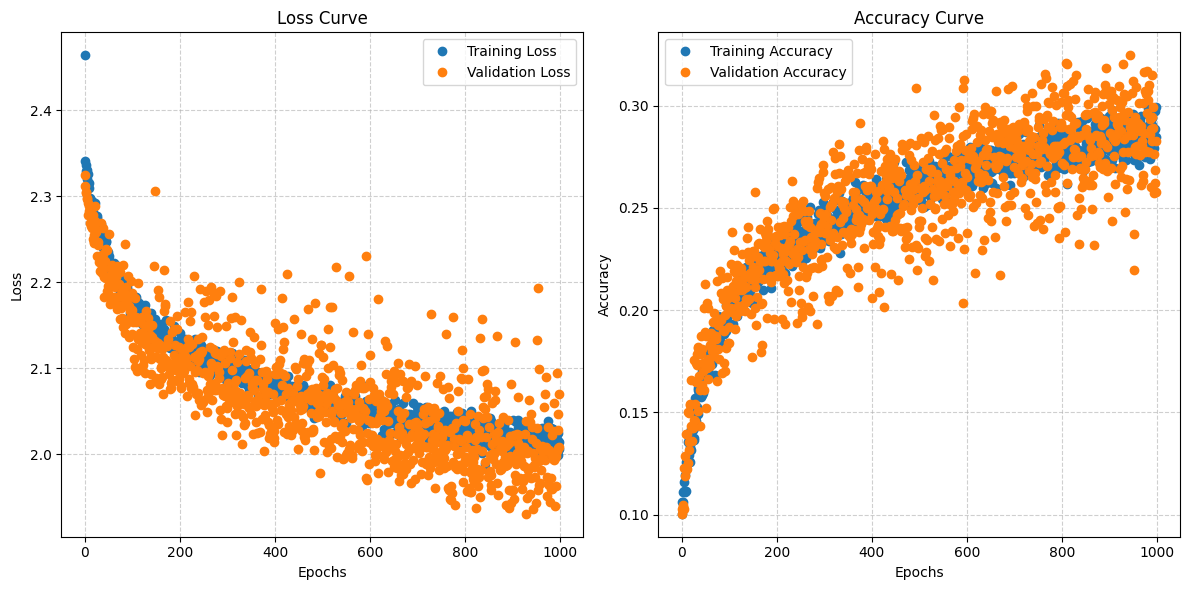

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], marker='o', linestyle='none', label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], marker='o', linestyle='none', label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], marker='o', linestyle='none', label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], marker='o', linestyle='none', label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
